In [1]:
#Loading rho, N and relaxation time from saved data
import pandas as pd
import numpy as np

# Load the Excel file
df2 = pd.read_excel('order_param_data.xlsx')

# Get distinct N and rho values
N_array = np.sort(df2['N'].unique())  # Unique values of N, sorted
rho_array = np.sort(df2['Density'].unique())  # Unique values of Density (rho), sorted

# Initialize the relaxation_times matrix with zeros
mean_order_param_array = np.zeros((len(N_array), len(rho_array)))

# Populate the relaxation_times matrix
for i, N in enumerate(N_array):
    for j, rho in enumerate(rho_array):
        # Find the relaxation time for this N and rho, if it exists
        matching_row = df2[(df2['N'] == N) & (df2['Density'] == rho)]
        if not matching_row.empty:
            mean_order_param_array[i, j] = matching_row['Order_Parameter'].values[0]  # Store the relaxation time

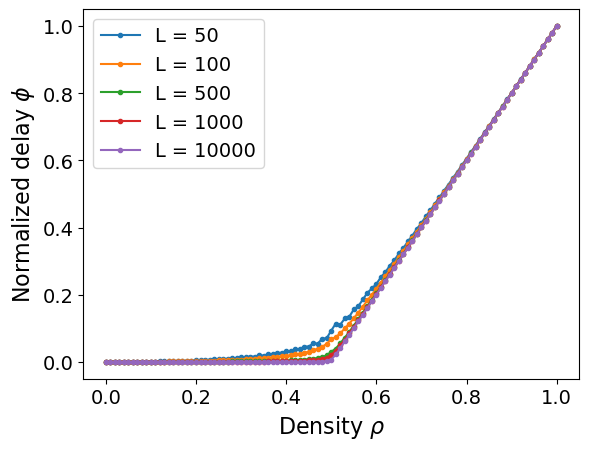

In [3]:
#Modified better graphs for paper - Dec 30, 2024

# Importing the necessary library
import matplotlib.pyplot as plt

# Plotting the order parameters
for i, N in enumerate(N_array):
    plt.plot(rho_array, mean_order_param_array[i, :], label=f'L = {N}', marker='.')

# Customizing the plot
plt.xlabel(r'Density $\rho$', fontsize=16)  # Bigger font size for axes labels
plt.ylabel(r'Normalized delay $\phi$', fontsize=16)
plt.xticks(fontsize=14)  # Bigger font size for ticks
plt.yticks(fontsize=14)
plt.legend(fontsize=14, frameon=True)  # Bigger text size and keep the legend box
plt.show()  # Removing the grid (default is no grid)


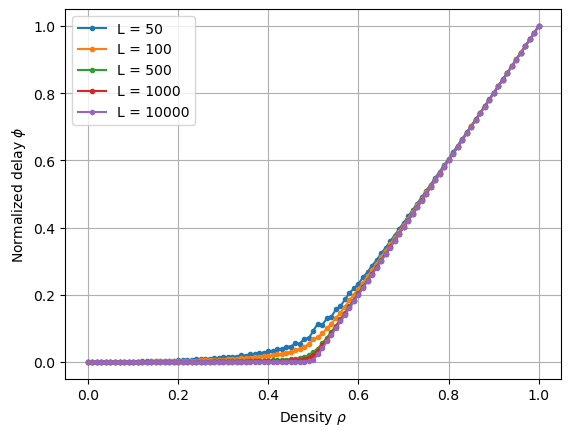

In [2]:
#plotting the order params
import matplotlib.pyplot as plt
for i, N in enumerate(N_array):
    plt.plot(rho_array, mean_order_param_array[i, :], label=f'L = {N}', marker='.')#, mec = 'black')

plt.xlabel(r'Density $\rho$')
plt.ylabel(r'Normalized delay $\phi$')
#plt.title('Relaxation Time vs Density for different N values')
plt.legend()
plt.grid(True)
plt.show()

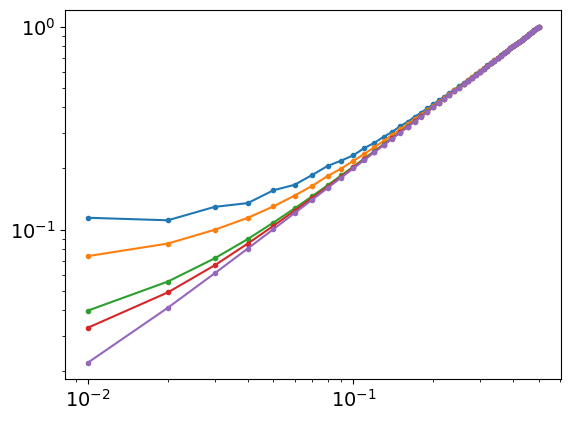

In [5]:
#gacny inset plot - Dec 30, 2024
# Importing the necessary library
import matplotlib.pyplot as plt

# Plotting the rho > 0.5 part as log-log to see power law emerging
reduced_rho_array = rho_array[int((len(rho_array) - 1) / 2) + 1:] - 0.5

for i, N in enumerate(N_array):
    plt.loglog(reduced_rho_array, mean_order_param_array[i, int((len(rho_array) - 1) / 2) + 1:], 
               label=f'L = {N}', marker='.')

# Customizing the plot
plt.xticks(fontsize=14)  # Bigger font size for x-axis ticks
plt.yticks(fontsize=14)  # Bigger font size for y-axis ticks
#plt.legend(fontsize=14, frameon=True)  # Optional: Add legend with bigger font size
plt.show()  # No grid (default is no grid)


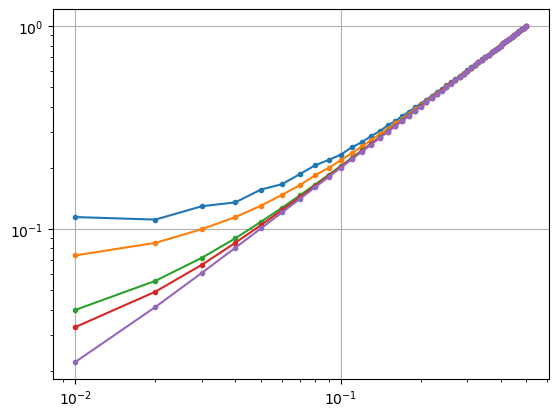

In [3]:
#plotting the rho> 0.5 part as loglog to see power law emerging
import matplotlib.pyplot as plt

reduced_rho_array = rho_array[int((len(rho_array)-1)/2)+1:] - 0.5

for i, N in enumerate(N_array):
    plt.loglog(reduced_rho_array, mean_order_param_array[i, int((len(rho_array)-1)/2)+1:], label=f'L = {N}', marker='.')
#plt.xlabel('Density (rho - 0.5)')
#plt.ylabel('Order Param')
#plt.title('Relaxation Time vs Density for different N values')
#plt.legend()
plt.grid(True)
plt.show()

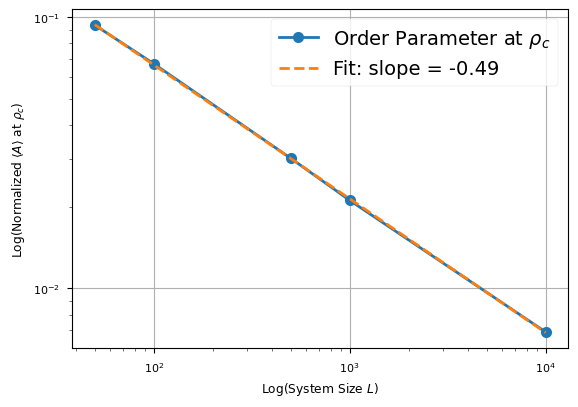

Slope of the line: -0.49


In [9]:
#Obtaining behaviour of order param at rho = rho_c 

# Extract the index corresponding to rho_c = 0.5
rho_c_index = np.argmin(np.abs(rho_array - 0.5))

# Extract the order parameter values at rho_c for different system sizes
order_param_at_rho_c = mean_order_param_array[:, rho_c_index]

# Plot the order parameter values at rho_c on a log-log plot
plt.figure()
plt.loglog(N_array, order_param_at_rho_c, marker='o', linestyle='-', label=r'Order Parameter at $\rho_c$')

# Fit a line to the log-log data to obtain the slope
log_N_array = np.log(N_array)
log_order_param_at_rho_c = np.log(order_param_at_rho_c)
slope, intercept = np.polyfit(log_N_array, log_order_param_at_rho_c, 1)

# Plot the fitted line
plt.loglog(N_array, np.exp(intercept) * N_array**slope, linestyle='--', label=f'Fit: slope = {slope:.2f}')

plt.xlabel(r'Log(System Size $L$)')
plt.ylabel(r'Log(Normalized $\langle A \rangle$ at $\rho_c$)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Slope of the line: {slope:.2f}")


C:\Users\aryam\AppData\Local\Temp\ipykernel_30748\303177660.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


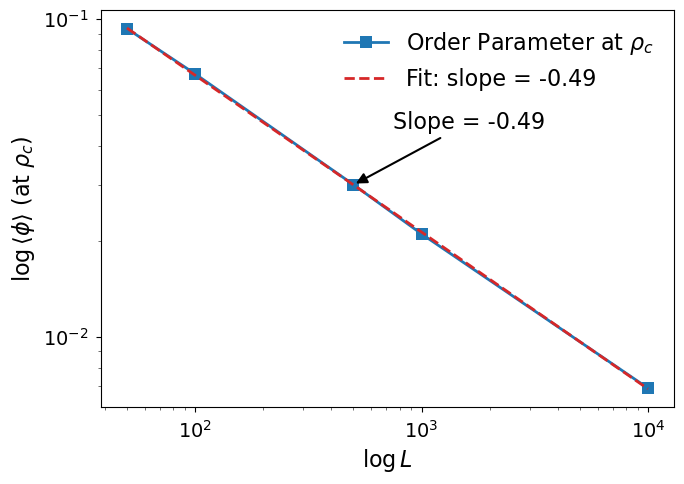

Slope of the line: -0.49


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Set the plotting style for a professional look
plt.style.use('seaborn-paper')
plt.rcParams.update({
    'font.size': 12,  # Base font size
    'legend.fontsize': 14,  # Bigger legend font size
    'lines.markersize': 8,  # Marker size
    'lines.linewidth': 2,  # Line width
})

# Extract the index corresponding to rho_c = 0.5
rho_c_index = np.argmin(np.abs(rho_array - 0.5))

# Extract the order parameter values at rho_c for different system sizes
order_param_at_rho_c = mean_order_param_array[:, rho_c_index]

# Log-log plot of the order parameter values at rho_c
fig, ax = plt.subplots(figsize=(7, 5))
ax.loglog(N_array, order_param_at_rho_c, marker='s', linestyle='-', color='tab:blue', label=r'Order Parameter at $\rho_c$')

# Fit a line to the log-log data to obtain the slope
log_N_array = np.log(N_array)
log_order_param_at_rho_c = np.log(order_param_at_rho_c)
slope, intercept = np.polyfit(log_N_array, log_order_param_at_rho_c, 1)

# Plot the fitted line
ax.loglog(N_array, np.exp(intercept) * N_array**slope, linestyle='--', color='tab:red', label=f'Fit: slope = {slope:.2f}')

# Customize axes labels
ax.set_xlabel(r'$\log L$', fontsize=16)  # Larger font size for x-axis label
ax.set_ylabel(r'$\log \langle \phi \rangle$ (at $\rho_c$)', fontsize=16)  # Larger font size for y-axis label

# Customize axes ticks
ax.tick_params(axis='both', which='major', labelsize=14)  # Larger tick font size

# Customize legend
ax.legend(loc='best', frameon=False, fontsize=16)  # Bigger font size for the legend

# Annotate the slope on the plot with a thicker arrow
text_x = N_array[int(len(N_array) / 2)]
text_y = np.exp(intercept) * text_x**slope
ax.annotate(f'Slope = {slope:.2f}', xy=(text_x, text_y), xytext=(text_x * 1.5, text_y * 1.5),
            arrowprops=dict(facecolor='black', arrowstyle='-|>', linewidth=1.5), fontsize=16)  # Thicker arrow and bigger font size

# Show the plot
plt.tight_layout()
plt.show()

print(f"Slope of the line: {slope:.2f}")


C:\Users\aryam\AppData\Local\Temp\ipykernel_30748\3961979815.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


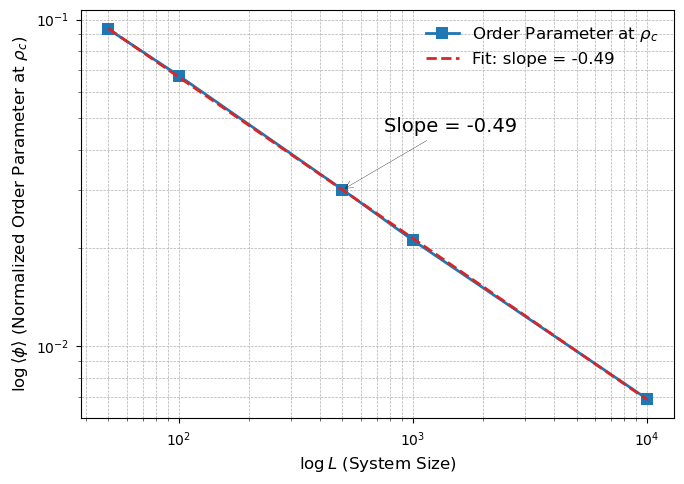

Slope of the line: -0.49


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set the plotting style for a professional look
plt.style.use('seaborn-paper')
plt.rcParams.update({
    'font.size': 12,  # Base font size
    'axes.labelsize': 12,  # Axis labels
    'xtick.labelsize': 10,  # X-axis tick labels
    'ytick.labelsize': 10,  # Y-axis tick labels
    'legend.fontsize': 12,  # Legend font size
    'lines.markersize': 8,  # Marker size
    'lines.linewidth': 2,  # Line width
})

# Extract the index corresponding to rho_c = 0.5
rho_c_index = np.argmin(np.abs(rho_array - 0.5))

# Extract the order parameter values at rho_c for different system sizes
order_param_at_rho_c = mean_order_param_array[:, rho_c_index]

# Log-log plot of the order parameter values at rho_c
fig, ax = plt.subplots(figsize=(7, 5))
ax.loglog(N_array, order_param_at_rho_c, marker='s', linestyle='-', color='tab:blue', label=r'Order Parameter at $\rho_c$')

# Fit a line to the log-log data to obtain the slope
log_N_array = np.log(N_array)
log_order_param_at_rho_c = np.log(order_param_at_rho_c)
slope, intercept = np.polyfit(log_N_array, log_order_param_at_rho_c, 1)

# Plot the fitted line
ax.loglog(N_array, np.exp(intercept) * N_array**slope, linestyle='--', color='tab:red', label=f'Fit: slope = {slope:.2f}')

# Label the axes with LaTeX formatting
ax.set_xlabel(r'$\log L$ (System Size)')
ax.set_ylabel(r'$\log \langle \phi \rangle$ (Normalized Order Parameter at $\rho_c$)')

# Add a legend and grid
ax.legend(loc='best', frameon=False)
ax.grid(True, which="both", ls="--", lw=0.5)

# Annotate the slope on the plot
text_x = N_array[int(len(N_array) / 2)]
text_y = np.exp(intercept) * text_x**slope
ax.annotate(f'Slope = {slope:.2f}', xy=(text_x, text_y), xytext=(text_x * 1.5, text_y * 1.5),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

print(f"Slope of the line: {slope:.2f}")


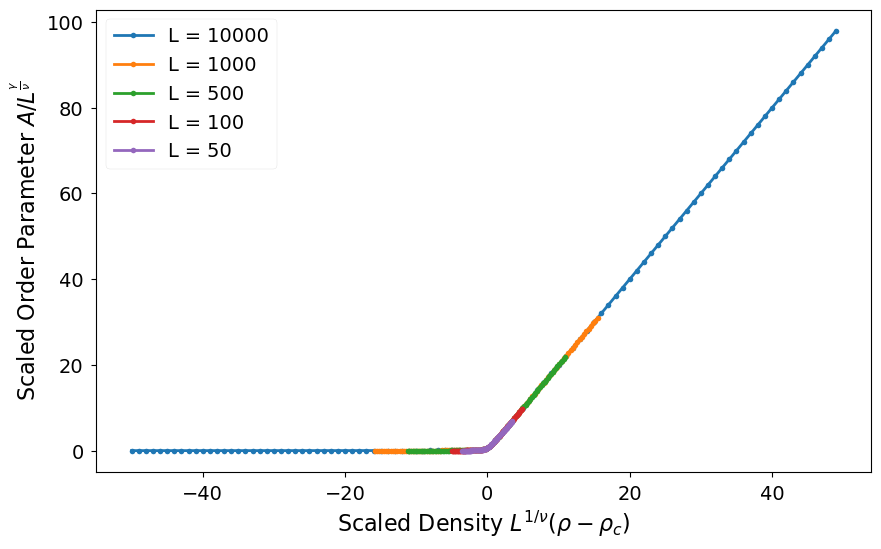

In [11]:
#fancy code for paper-

# Finite size scaling collapse

def transform_fss_data(mean_order_param_array, N_array, rho_array, rho_c, nu, z):
    """
    Transform the relaxation times and densities according to finite size scaling hypothesis.

    Parameters:
    relaxation_times (2D array): Array of relaxation times with shape (len(N_array), len(rho_array)).
    N_array (list or array): Array of system sizes.
    rho_array (list or array): Array of densities.
    rho_c (float): Critical density.
    nu (float): Correlation length exponent.
    z (float): Dynamic critical exponent.

    Returns:
    scaled_rho (1D array): Scaled densities.
    scaled_relaxation_time (1D array): Scaled relaxation times.
    """
    scaled_rho = []
    scaled_mean_order_params = []

    for i, N in enumerate(N_array):
        for j, rho in enumerate(rho_array):
            scaled_rho.append(N**(1/nu) * (rho - rho_c))
            scaled_mean_order_params.append(mean_order_param_array[i, j] / N**z)

    return np.array(scaled_rho), np.array(scaled_mean_order_params)

# Example usage of finite size scaling function
#----------------------------------------------------------------

rho_c = 0.5  # Critical density
nu = 2.00  # Example value for correlation length exponent (to be optimized)
z = -0.50   # Example value for dynamic critical exponent (to be optimized)

scaled_rho, scaled_mean_order_params = transform_fss_data(mean_order_param_array, N_array, rho_array, rho_c, nu, z)

# Plot the transformed data
plt.figure(figsize=(10, 6))

for l in reversed(range(len(N_array))):
    plt.plot(
        scaled_rho[l * len(rho_array):(l + 1) * len(rho_array) - 1], 
        scaled_mean_order_params[l * len(rho_array):(l + 1) * len(rho_array) - 1],
        linestyle='-', marker='.', label=f'L = {N_array[l]}'
    )

# Customizing the plot
plt.xlabel(r'Scaled Density $L^{1/\nu} (\rho - \rho_c)$', fontsize=16)  # Bigger axes labels
plt.ylabel(r'Scaled Order Parameter $A/ L^{\frac{\gamma}{\nu}}$', fontsize=16)
plt.xticks(fontsize=14)  # Bigger ticks
plt.yticks(fontsize=14)
plt.legend(fontsize=14, frameon=True)  # Bigger legend text and keep the box
#plt.title('Finite Size Scaling Transformed Data', fontsize=16)
plt.show()  # No grid


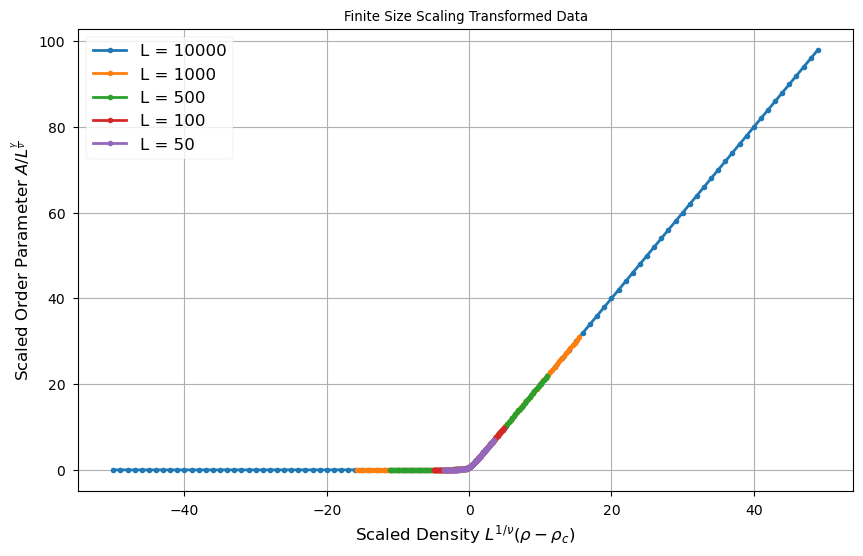

In [13]:
#finite size scaling collapse



def transform_fss_data(mean_order_param_array, N_array, rho_array, rho_c, nu, z):
    """
    Transform the relaxation times and densities according to finite size scaling hypothesis.

    Parameters:
    relaxation_times (2D array): Array of relaxation times with shape (len(N_array), len(rho_array)).
    N_array (list or array): Array of system sizes.
    rho_array (list or array): Array of densities.
    rho_c (float): Critical density.
    nu (float): Correlation length exponent.
    z (float): Dynamic critical exponent.

    Returns:
    scaled_rho (1D array): Scaled densities.
    scaled_relaxation_time (1D array): Scaled relaxation times.
    """
    scaled_rho = []
    scaled_mean_order_params = []

    for i, N in enumerate(N_array):
        for j, rho in enumerate(rho_array):
            scaled_rho.append(N**(1/nu) * (rho - rho_c))
            scaled_mean_order_params.append(mean_order_param_array[i, j] / N**z)

    return np.array(scaled_rho), np.array(scaled_mean_order_params)

# Example usage of finite size scaling function
#----------------------------------------------------------------

rho_c = 0.5  # Critical density
nu = 2.00  # Example value for correlation length exponent (to be optimized)
z = -0.50   # Example value for dynamic critical exponent (to be optimized)

scaled_rho, scaled_mean_order_params = transform_fss_data(mean_order_param_array, N_array, rho_array, rho_c, nu, z)

# Plot the transformed data
plt.figure(figsize=(10, 6))

for l in reversed(range(len(N_array))):
    plt.plot(scaled_rho[l*len(rho_array):(l+1)*len(rho_array) - 1], scaled_mean_order_params[l*len(rho_array):(l+1)*len(rho_array) - 1] , linestyle = '-', marker = '.', label=f'L = {N_array[l]}')
plt.xlabel(r'Scaled Density $L^{1/\nu} (\rho - \rho_c)$')
plt.ylabel(r'Scaled Order Parameter $A/ L^{\frac{\gamma}{\nu}}$')
plt.title('Finite Size Scaling Transformed Data')
plt.grid(True)
plt.legend()
plt.show()


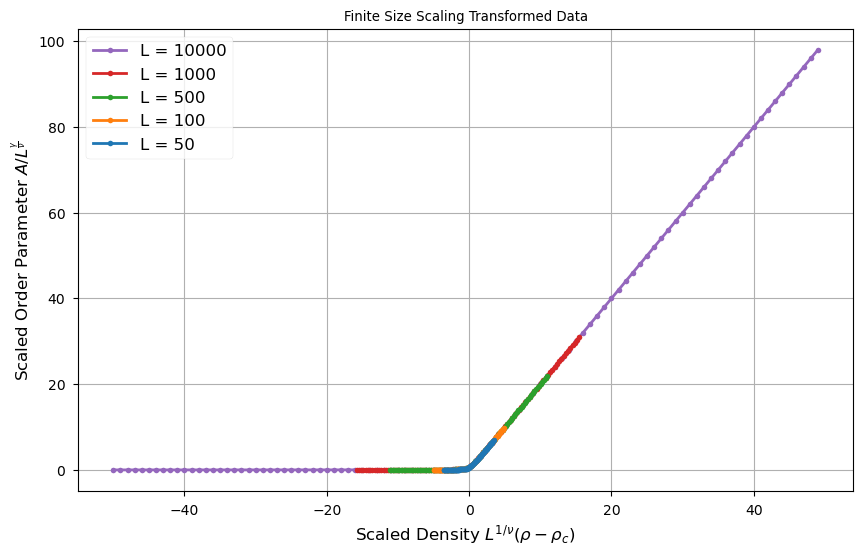

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first five colors from the default color cycle
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:5]

# Reverse the order of the first five colors
reversed_colors = default_colors[::-1]

#finite size scaling collapse

def transform_fss_data(mean_order_param_array, N_array, rho_array, rho_c, nu, z):
    """
    Transform the relaxation times and densities according to finite size scaling hypothesis.

    Parameters:
    relaxation_times (2D array): Array of relaxation times with shape (len(N_array), len(rho_array)).
    N_array (list or array): Array of system sizes.
    rho_array (list or array): Array of densities.
    rho_c (float): Critical density.
    nu (float): Correlation length exponent.
    z (float): Dynamic critical exponent.

    Returns:
    scaled_rho (1D array): Scaled densities.
    scaled_relaxation_time (1D array): Scaled relaxation times.
    """
    scaled_rho = []
    scaled_mean_order_params = []

    for i, N in enumerate(N_array):
        for j, rho in enumerate(rho_array):
            scaled_rho.append(N**(1/nu) * (rho - rho_c))
            scaled_mean_order_params.append(mean_order_param_array[i, j] / N**z)

    return np.array(scaled_rho), np.array(scaled_mean_order_params)

# Example usage of finite size scaling function
#----------------------------------------------------------------

rho_c = 0.5  # Critical density
nu = 2.00  # Example value for correlation length exponent (to be optimized)
z = -0.50   # Example value for dynamic critical exponent (to be optimized)

scaled_rho, scaled_mean_order_params = transform_fss_data(mean_order_param_array, N_array, rho_array, rho_c, nu, z)

# Plot the transformed data
plt.figure(figsize=(10, 6))

# Plot with reversed colors
for l in reversed(range(len(N_array))):
    plt.plot(scaled_rho[l*len(rho_array):(l+1)*len(rho_array) - 1], 
             scaled_mean_order_params[l*len(rho_array):(l+1)*len(rho_array) - 1], 
             linestyle='-', marker='.', color=reversed_colors[len(N_array) - l - 1], label=f'L = {N_array[l]}')

plt.xlabel(r'Scaled Density $L^{1/\nu} (\rho - \rho_c)$')
plt.ylabel(r'Scaled Order Parameter $A/ L^{\frac{\gamma}{\nu}}$')
plt.title('Finite Size Scaling Transformed Data')
plt.grid(True)
plt.legend()
plt.show()


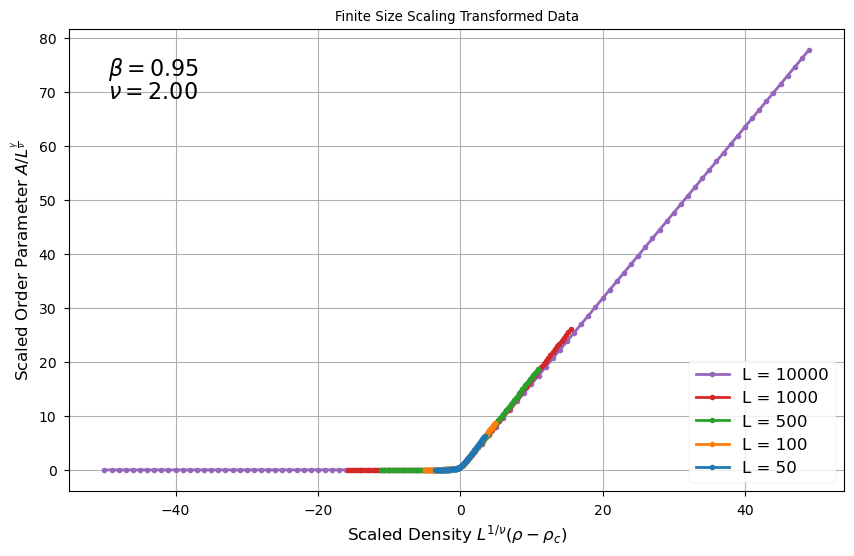

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first five colors from the default color cycle and reverse them
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color'][:5]
reversed_colors = default_colors[::-1]

# Finite size scaling collapse function
def transform_fss_data(mean_order_param_array, N_array, rho_array, rho_c, nu, z):
    scaled_rho = []
    scaled_mean_order_params = []

    for i, N in enumerate(N_array):
        for j, rho in enumerate(rho_array):
            scaled_rho.append(N**(1/nu) * (rho - rho_c))
            scaled_mean_order_params.append(mean_order_param_array[i, j] / N**z)

    return np.array(scaled_rho), np.array(scaled_mean_order_params)

# Example usage of finite size scaling function
#----------------------------------------------------------------

rho_c = 0.5  # Critical density
nu = 2.00  # Correlation length exponent (best-fit value)
beta = 0.95
z = -beta/nu   # Scaling exponent (related to beta)

# Example data (replace with actual data)

# Transform the data using finite size scaling
scaled_rho, scaled_mean_order_params = transform_fss_data(mean_order_param_array, N_array, rho_array, rho_c, nu, z)

# Plot the transformed data
plt.figure(figsize=(10, 6))

# Plot with reversed colors
for l in reversed(range(len(N_array))):
    plt.plot(scaled_rho[l*len(rho_array):(l+1)*len(rho_array) - 1], 
             scaled_mean_order_params[l*len(rho_array):(l+1)*len(rho_array) - 1], 
             linestyle='-', marker='.', color=reversed_colors[len(N_array) - l - 1], label=f'L = {N_array[l]}')

# Display the best-fit values of beta and nu on the plot
plt.text(0.05, 0.9, f"$\\beta = {beta:.2f}$", transform=plt.gca().transAxes, fontsize=16, fontweight='bold')
plt.text(0.05, 0.85, f"$\\nu = {nu:.2f}$", transform=plt.gca().transAxes, fontsize=16, fontweight='bold')

# Add labels and title
plt.xlabel(r'Scaled Density $L^{1/\nu} (\rho - \rho_c)$')
plt.ylabel(r'Scaled Order Parameter $A / L^{\frac{\gamma}{\nu}}$')
plt.title('Finite Size Scaling Transformed Data')
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()
